In [1]:
from fmiopendata.wfs import download_stored_query

<Figure size 1000x1000 with 0 Axes>

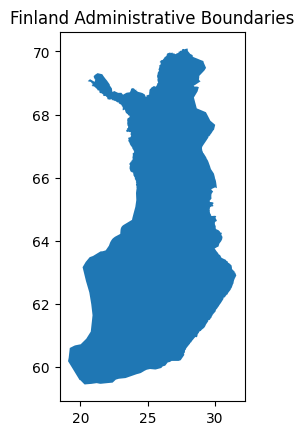

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = 'finland_administrative_boundaries_national_polygon.shp'
finland_map = gpd.read_file(shapefile_path)

# Plot the shapefile
plt.figure(figsize=(10, 10))
finland_map.plot()
plt.title('Finland Administrative Boundaries')
plt.show()

In [ ]:
from adjustText import adjust_text  # This is a handy library for adjusting text positions to avoid overlaps

import datetime as dt
from fmiopendata.wfs import download_stored_query

# Retrieve the latest hour of data from a bounding box
end_time = dt.datetime.utcnow()
start_time = end_time - dt.timedelta(hours=1)
# Convert times to properly formatted strings
start_time = start_time.isoformat(timespec="seconds") + "Z"
end_time = end_time.isoformat(timespec="seconds") + "Z"

obs = download_stored_query("fmi::observations::weather::multipointcoverage",
                            args=["bbox=18,55,35,75",
                                  "starttime=" + start_time,
                                  "endtime=" + end_time])

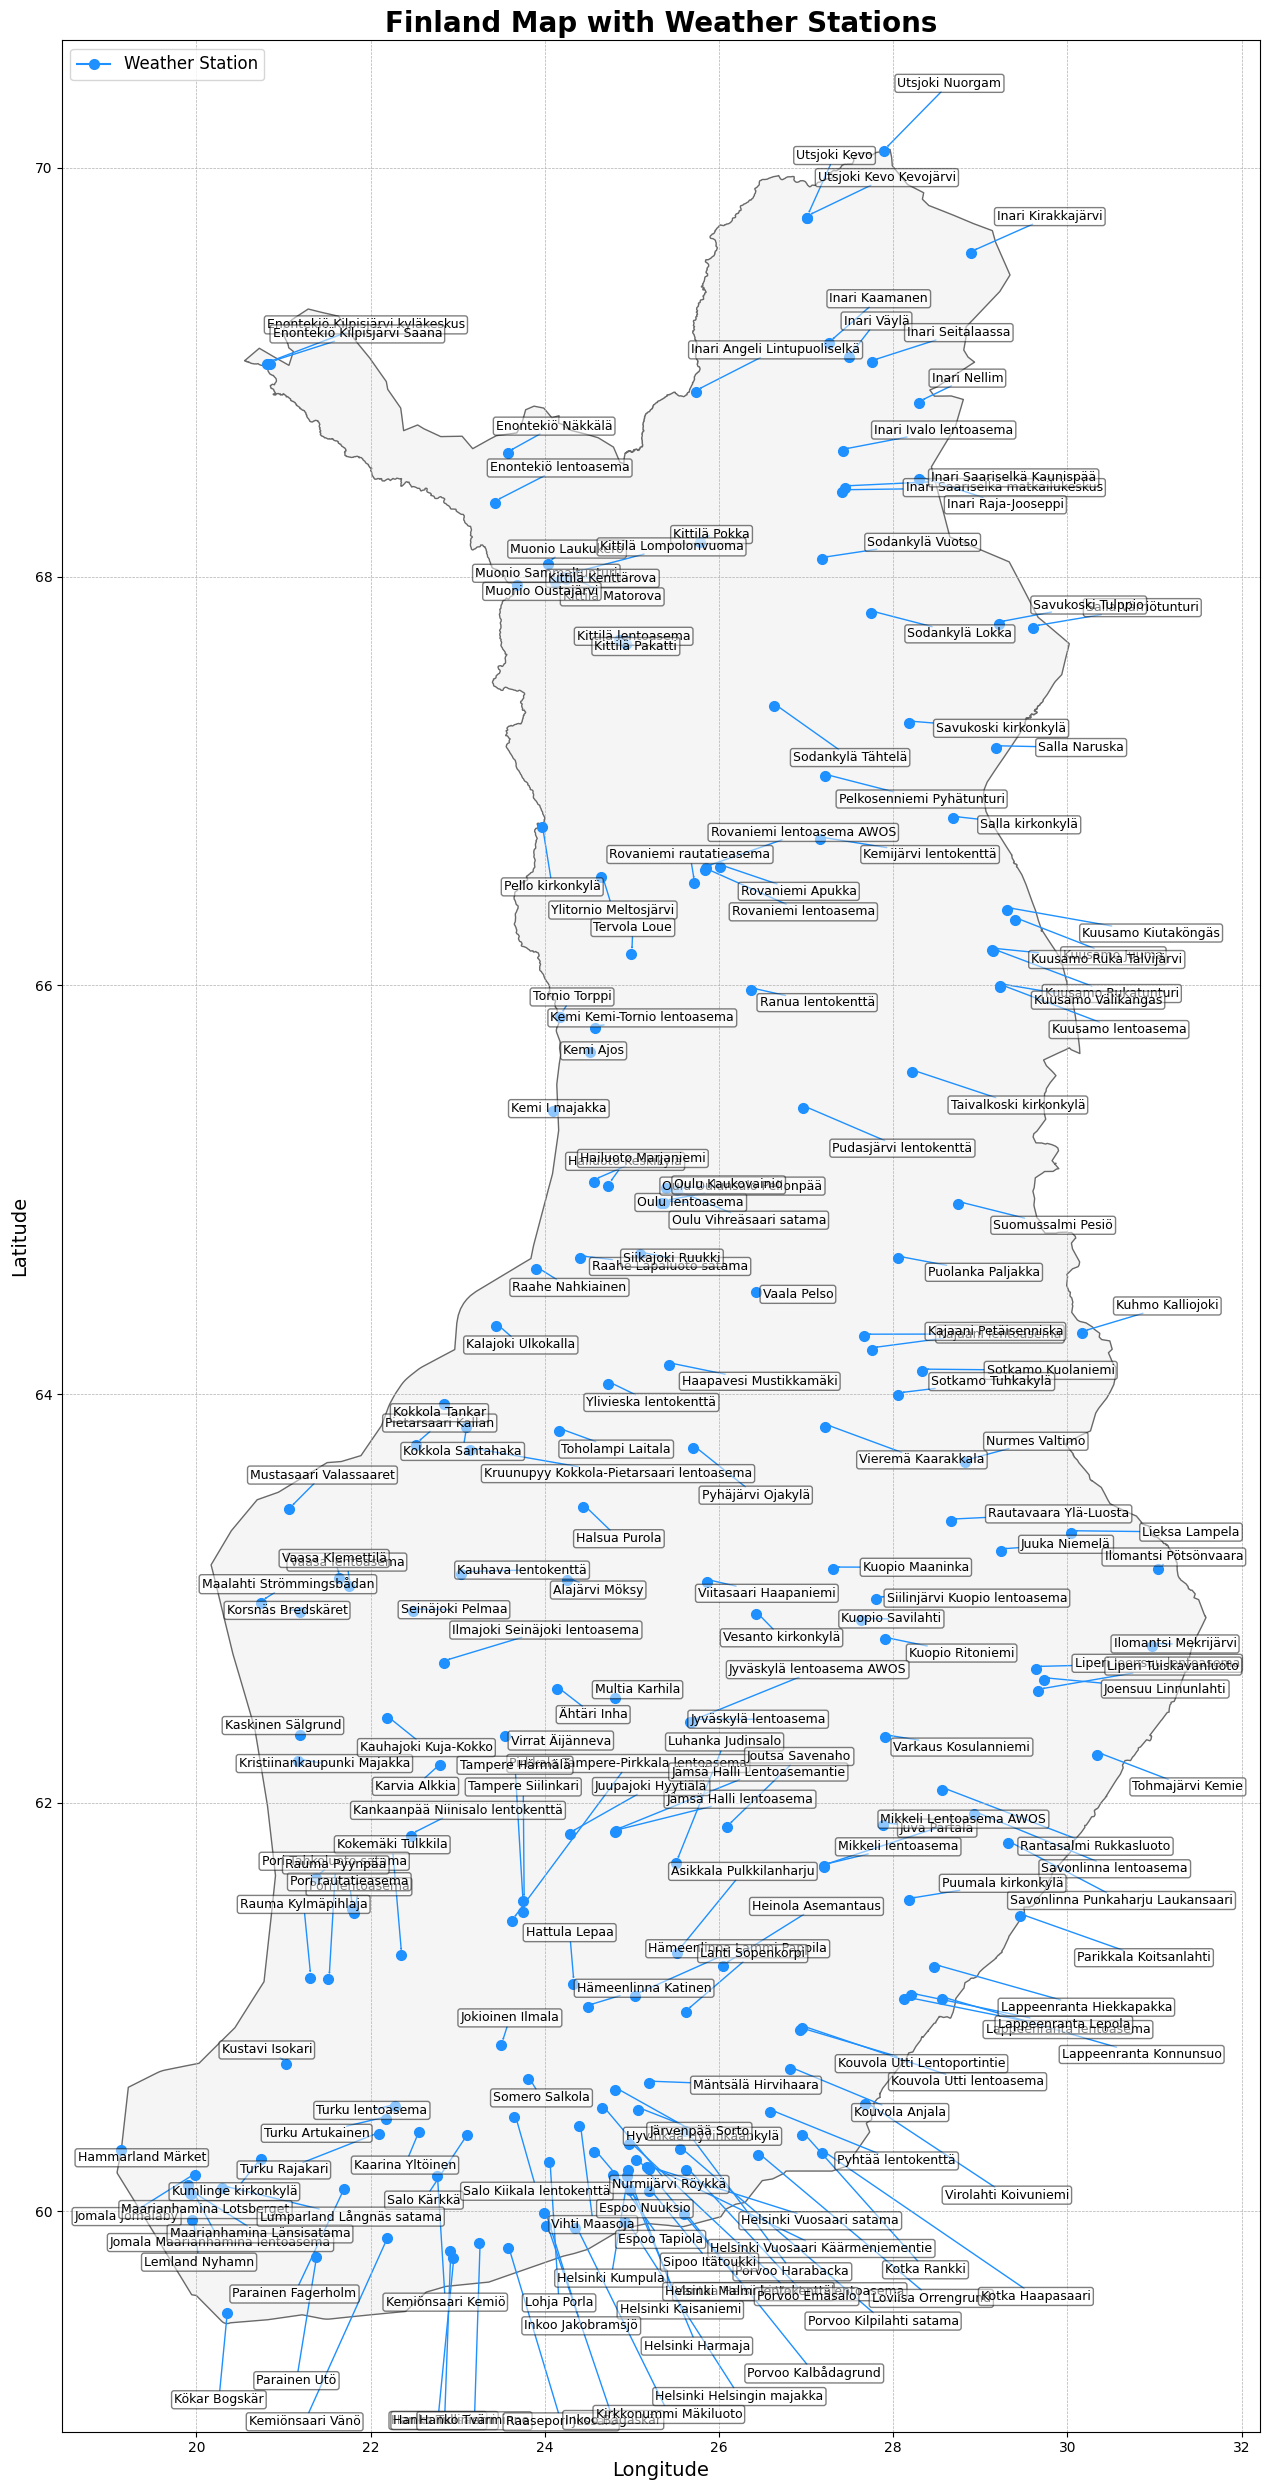

In [56]:
# Plot the shapefile and add the weather station locations
fig, ax = plt.subplots(figsize=(25, 25))
finland_map.plot(ax=ax, color='whitesmoke', edgecolor='dimgray')

texts = []
for station, metadata in obs.location_metadata.items():
    ax.plot(metadata['longitude'], metadata['latitude'], marker='o', color='dodgerblue', markersize=7, label='Weather Station')
    # Add the station name as an annotation to the plot
    texts.append(ax.text(metadata['longitude'] + 0.01, metadata['latitude'] + 0.01, station, fontsize=9, 
                         ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.2')))

# Use adjust_text to prevent overlapping of annotations
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='dodgerblue'))

ax.set_title('Finland Map with Weather Stations', fontsize=20, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Only add legend for the first marker to avoid duplicate entries
handles, labels = ax.get_legend_handles_labels()
if handles:
    ax.legend([handles[0]], [labels[0]], loc='upper left', fontsize='large')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()